# Processando a Informação: Cap. 8: Ponteiros






<img src="https://editora.ufabc.edu.br/images/Capa_Processando_Informacao.jpg" alt="Capa" width="150" align="right">

![]("figs/Capa_Processando_Informacao.jpg")

Este caderno (Notebook) é parte complementar *online* do livro **[Processando a Informação](https://editora.ufabc.edu.br/matematica-e-ciencias-da-computacao/58-processando-a-informacao): um livro prático de programação independente de linguagem**, que deve ser consultado no caso de dúvidas sobre os temas apresentados. 

> Este conteúdo pode ser copiado e alterado livremente e foi inspirado nesse livro. 

> O conteúdo deste capítulo foi inspirado em:
* Notas do prof. Paulo Feofiloff: [1](https://www.ime.usp.br/~pf/algoritmos/aulas/pont.html); [2](https://www.ime.usp.br/~pf/algoritmos/aulas/aloca.html)
* Notas de aula de professores da UFABC, em especial, dos professores Luiz Rozante e Wagner Botelho.
* Para mais detalhes sobre alocação de memória [ref](https://www.inf.ufpr.br/roberto/ci067/10_aloc.html).



## Sumário
* Revisão do capítulo anterior
* Introdução
* Alocação estática
* Alocação dinâmica
* Alocação dinâmica para *array* multimensional
* Revisão deste capítulo
* Exercícios

## Revisão do capítulo anterior (Struct)

* Introdução
* Paradigma Estruturado
* Paradigma Orientado a Objetos
* Tipos de dados
* Arquivos
* Revisão deste capítulo
* Exercícios

## Introdução

* *Ponteiros* são variáveis especiais que recebem valores referentes à *endereços* da memória principal do computador (RAM - *Random Access Memory*). 

* Ao ligar um computador, o sistema operacional é carregado da memória secundária para a RAM. 

* Quando criamos um programa em alguma linguagem de programação e executamos, esse programa também é carregado na RAM.

* Uma variável `x=10` criada nesse programa também será enderaçada na RAM, por exemplo, no endereço `FF10AF` (em hexadecimal).

* Algumas linguagens de programação aceitam também variáveis especiais do tipo *ponteiros*. Por exemplo, em C podemos criar `int *p=FF10AF`.

* Em geral, não precisamos saber qual é o endereço de memória de uma variável, mas é importante saber associar a um ponteiro. Por exemplo, a seguir é criada uma variável inteira `x=10` e em seguida um ponteiro `p` é associado a `x`, incluindo um prefixo `&`, para pegar o endereço de memória de `x` e associar a `p`, com `p = &x`. Para alterar o conteúdo de `p` (o mesmo de `x`), basta incluir o prefixo `*`, ou seja, `*p = 15`. Ver também a figura a seguir para melhor visualizar operações com ponteiros. 

```
  int x = 10;
  int *p;     // cria um ponteiro para um inteiro
  p = &x;     // faz p apontar para o endereço de x
  *p = 15;    // altera o conteúdo de p (e também de x)
  printf("x=%d *p=%d", x, *p);
```

## Alocação estática

* A *alocação estática* ocorre em *tempo de compilação* a depender a linguagem de programação escolhida. Por exemplo, no exemplo a seguir, o vetor `v` é criado contendo 3 elementos inteiros. Não é possível incluir um quarto elemento nesse vetor quando executamos o progroma (ou seja, em *tempo de execução*). 
* Ao criar vetores ou matrizes, estamos criando ponteiros para o primeiro elemento dessas estruturas. Por exemplo,

``` 
  int v[3] = { 5,6,7 };
  int* p1;
  p1 = v; // observe que aqui não precisa usar &v
  for (int i = 0; i < 3; i++)
    printf("%d %d %d\n", *(p1 + i), p1[i], v[i]); // *(p1+i) = p1[i] = v[i]
```

* Assim, nesse exemplo é possível fazer operações de ponteiros (`p1 + i`) para acessar os endereços `p1, p1+1, p1+2,` $\cdots $

* Para a variável ponteiro do tipo *char*, `char *p` ocupa um *byte*. Para *int* são 4 *bytes* e para *double* são 8 *bytes*, a dependendo da arquitetura do computador. 

* Para saber a quantidade de *bytes* que uma variável ocupa, usar a função `sizeof`. 

* Por exemplo, para uma variável do tipo `double`, basta fazer `sizeof (double)`, ou `sizeof(p1)`, onde `p1` foi definido no exemplo anterior.

* Também é possível calcular o tamanho de um vetor em tempo de execução. Para o exemplo anterior, basta fazer: `sizeof(v) / sizeof(int)`. 

* Esse cálculo é útil para saber o tamanho de um *array* alocado estaticamente definido em tempo de execução (o mesmo não funciona para *alocação dinâmica* - ver próxima seção).

![]("figs/cap8_1.png")

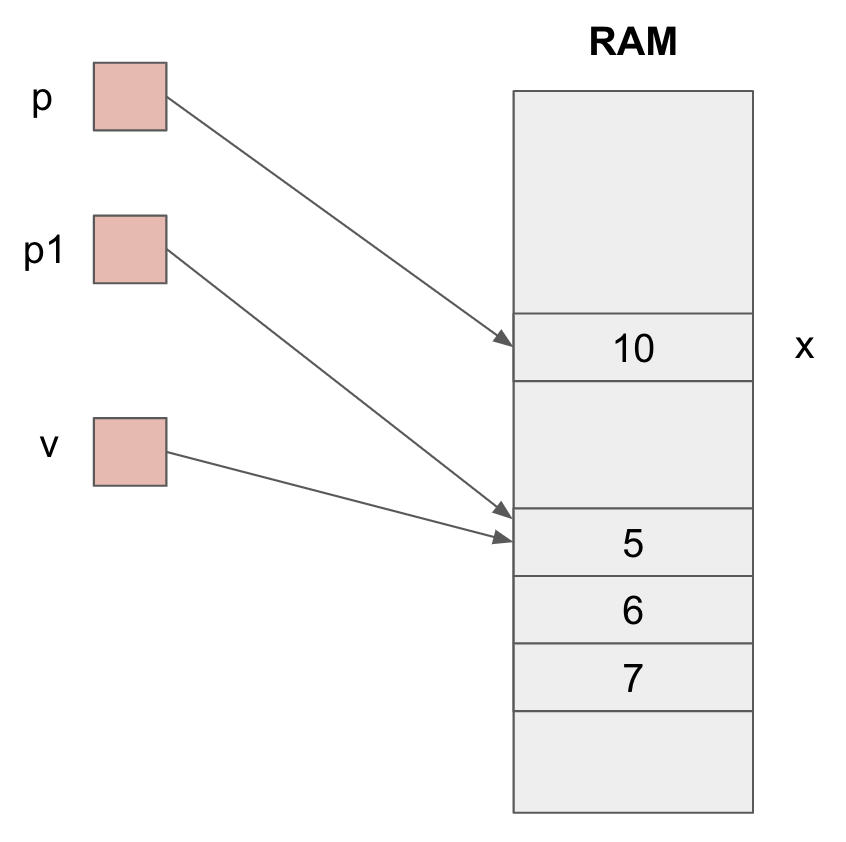

* Também é possível fazer operações de ponteiros para *array* de  `struct`. Ver um exemplo a seguir:


### Exemplo 01 - Criar um registro de Aluno, com `scanf`

Exemplo para criar um *array* de `struct` **Aluno** contendo 4 atributos lidos do teclado com `scanf`. Associar um ponteiro para essa `struct`.

![]("figs/cap8_2.png")

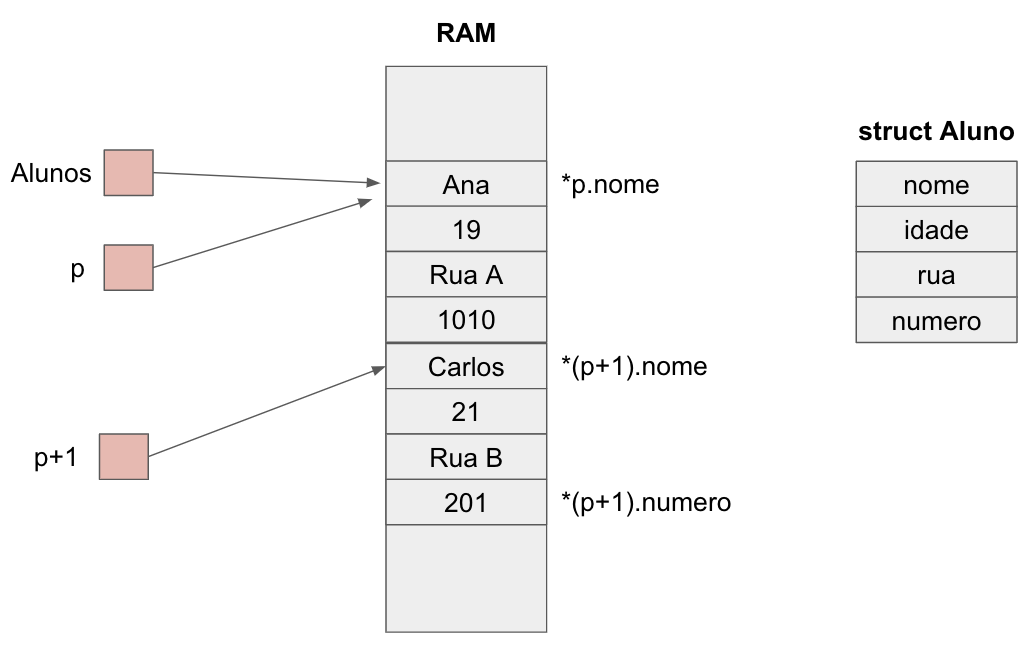

In [ ]:
%%writefile cap8ex01.c
#include <stdio.h>
#include <string.h>

typedef struct {
  char nome[50];
  int idade;
  char rua[50];
  int numero;
} Aluno;

int main() {
  Aluno Alunos[2]; // instancia uma vetor do tipo Aluno
  Aluno *p; // cria um ponteiro para Aluno
  p = Alunos; // ATENÇÃO: associa p a array de alunos
  // ENTRADA DE DADOS
  for (int i = 0; i < 2; i++) {
    printf("Entre com os dados: nome, idade, rua, número:\n");
    fflush(stdin);
    fgets(p[i].nome, 50, stdin);
    scanf("%d", &p[i].idade);
    fflush(stdin);
    fgets(p[i].rua, 50, stdin);
    scanf("%d", &p[i].numero);
  }
  // SAÍDA DE DADOS
  for (int i = 0; i < 2; i++) {
    printf("nome: %s\nidade: %d\n", p[i].nome, p[i].idade);
    printf("rua: %s\nnúmero: %d\n", p[i].rua, p[i].numero);
  }
  return 0;
}

In [ ]:
%%shell
gcc -Wall -std=c99 cap8ex01.c -o output
./output

## Alocação dinâmica

* A alocação dinâmica ocorre quando não sabemos o tamanho de um *array* em tempo de compilação, sendo necessário alocar em tempo de execução. 

* Até agora utilizamos alocação estática para definir o tamanho de um *array*. Por exemplo, para criar um *array* de alunos da UFABC, podemos criar um *array* "muito grande", por exemplo, contendo 100000 alunos.

* Nesse caso, temos dois problemas, se um dia tivermos mais que 100000 alunos, esse *array* não vai suportar. 

* O outro problema é que em geral estamos desperdiçando memória RAM com as posição do *array* não utilizadas.

* Para resolver isso, utilizamos *alocação dinâmica*, inserindo ou retirando elementos do *array* conforme a demanda. 

* Na linguagem C existem os seguintes comandos da biblioteca `stdlib.h`:

  * `malloc` 
    * sintaxe: `int * p = (int *) malloc( TAMANHO * sizeof(int) )`
    * comando utilizado para alocar um *array* de `TAMANHO` de inteiros. 
    * O ponteiro `p` aponta para o primeiro elemento do *array*. 
    * É possível definir um *array* para qualquer tipo de dado, inclusive para `struct`.
    * Se `p = NULL` então não existe memória suficiente para a alocação.
  * `calloc` 
    * sintaxe: `int * p = (int *) calloc( TAMANHO,  sizeof(int) )`
    * análogo ao `malloc`, porém `calloc`:
      * possui dois argumentos;
      * inicializa todos os elementos com 0s;
      * assim, é um pouco mais lento.
  * `realloc` 
    * sintaxe: `int * p = (int *) realloc( TAMANHO,  sizeof(int) )`
    * realoca um *array* 
  * `free` 
    * <font color="red">sempre que alocamos memória dinâmicamente devemos liberar a memória no final, com o camando `free(p)`</font>.
    * se isso não for feito, a memória será liberada somente quando o computador for desligado (se o sistema operacional não tiver algum recurso de "coleta de lixo").


### Exemplo de alocação estática

```
void main(){
    int TAMANHO = 0;
    scanf("%i", &TAMANHO);
    int v[TAMANHO]; // NÃO PODE ALTER O TAMANHO APÓS CRIADO!!!
    // free(v); // LOGO, NÃO PODE USAR free!!!
}
```

É possível calcular o tamanho de um vetor alocado estaticamente:

```
void funcao(int *v) {
    int tam = sizeof(v) / sizeof(int); 
    printf("\nTESTE2: sizeof(v)=%li sizeof(int)=%li tam=%d", sizeof(v), sizeof(int), tam);
}
int main()
{
    int v[5]={3,4,5,6,7}; 
    int tam = sizeof(v) / sizeof(int); 
    printf("\nTESTE1: sizeof(v)=%li sizeof(int)=%li tam=%d", sizeof(v), sizeof(int), tam); // CORRETO!!!
    
    funcao(v); // INCORRETO!!!
    return 0;
} 
````

Retorna:

```
TESTE1: sizeof(v)=20 sizeof(int)=4 tam=5
TESTE2: sizeof(v)=8 sizeof(int)=4 tam=2
```

O mesmo calculo não é possível para vetores alocados dinamicamente:

```
int *p = malloc(5*sizeof(int));
int tam = sizeof(p) / sizeof(int); 
printf("\nTESTE3: sizeof(p)=%li sizeof(int)=%li tam=%d", sizeof(p), sizeof(int), tam);
```

Retorna (INCORRETO!!!):

```
TESTE3: sizeof(p)=8 sizeof(int)=4 tam=2
```

### Exemplo de alocação dinâmica

```
void main(){
    int TAMANHO = 0;
    scanf("%i", &TAMANHO);
    int *v = (int *) malloc( TAMANHO * sizeof(int) );
    free(v); // LIBERAR A MEMÓRIA - S E M P R E !!!!
}
```


## Alocação dinâmica para *array*  multidimensional

* Para utilizarmos matrizes com alocação dinâmica é interessante trabalharmos com *ponteiro para ponteiro*:
  * primeiro alocamos memória para as linhas (L) da matriz:
    * `int **m = (int**) malloc( L * sizeof(int *) );`
  * em seguida alocamos memória para cada linha da matriz contendo C (colunas) elementos:
    ``` 
      for (int i=0; i < L; i++) 
        m[i] = (int*) malloc( C * sizeof(int *) ); // m[i] = *(m+i)
    ```
  * para *popular* a matriz - opção 1:
    ``` 
      for (int i=0; i < L; i++) 
        for (int j=0; j < C; J++) 
          scanf("%d", &m[i][j]); // &m[i][j] = m + i*C + j
    ```
  * para *popular* a matriz - opção 2:
    ``` 
      for (int i=0; i < L*C; i++) 
          scanf("%d", m+i); // m+i = &m[i/C][i%C]
    ```
  * <font color="red">não esquecer de LIBERAR A MEMÓRIA</font>:
    * primeiro o conteúdo de cada linha:
    ``` 
      for (int i=0; i < L; i++) 
        free(m[i]); // m[i] = *(m+i)
    ```
    * depois toda a matriz:
    ```
    free(m);
    ```


* Também é possível utilizar um único ponteiro para criar uma matriz indexando os elementos das linhas/colunas (2D) em uma dimensão (1D):

```
int *m = (int *) malloc ( L * C * sizeof(int));

for (int i=0; i < L; i++) 
  for (int j=0; j < C; J++) 
    scanf("%d", m + i*C + j); // NÃO PODE USAR m[i][j]! POR QUÊ?

// ou simplesmente

for (int i=0; i < L * C; i++) 
  scanf("%d", m + i);
```

* Quais as vantagens de trabalhar com matriz utilizando **ponteiro para ponteiro** (2D - ex. `int **`) em relação a somente um ponteiro 1D (ex. `int *`)? 

## Exemplo 01 - Ler/Escrever matriz com métodos (cap.6 - Matriz)


* Analogamente ao que foi feito no capítulo sobre vetores, onde alocamos os vetores em tempo de execução através de métodos, é possível usar modularização para melhorar a organização, manutenção e reaproveitamento de código.  

* Aqui é apresentado um método `leiaMatriz` e `escrevaMatriz` genéricos

* Para entrada de dados, ou seja, inserir valores nos elementos alocados na memória para uma matriz.

* Além de saída de dados, para escrever a matriz, linha por linha.

#### Pseudocódigo

**Exemplo 01:** Considere um algoritmo para: 
* Ler um inteiro `L` (linhas) representando o número de alunos, 
* Ler um inteiro `C` representando o número de avaliações. 
* Considere a primeira coluna o `RA` do aluno, assim `C=C+1`. 
* Criar uma matriz `m` com dimensões `LxC`. 
* Ler todos os elementos da matriz.
* Escrever todos os elementos da matriz, formando a saída, linha por linha, por exemplo, para uma matriz com `2` alunos e `3` avaliações, escreva:

```
LISTA DE ALUNOS vs Avaliações:
1234 4 3 9
3456 6 4 8
```

```
Função inteiro m[][] leiaMatriz(inteiro L, inteiro C):
    Instanciar e alocar uma matriz m de Reais com L x C
    Para cada i, de i=0; até i<L; passo i=i+1 faça
        Para cada j, de j=0; até j<C; passo j=j+1 faça
            m[i,j] = leia("Digite um número inteiro:");

Função escrevaMatriz(inteiro m[][], inteiro L, inteiro C): 
    Instanciar e alocar uma matriz m de Reais com L x C
    Para cada i, de i=0; até i<L; passo i=i+1 faça
        Para cada j, de j=0; até j<C; passo j=j+1 faça
            escreva(" ", m[i,j]);
        escreva("\n"); // pula linha

// PROGRAMA PRINCIPAL
// ENTRADAS
inteiro L = leia("Digite o numero de alunos:")
inteiro C = leia("Digite o numero de avaliações:")
C = C + 1  // a primeira coluna é o RA
Instanciar uma matriz m com L linhas e C colunas 

m = leiaMatriz(L,C)
// PROCESSAMENTO: ?

// SAÍDA
escrevaMatriz(m)
```

#### Casos para Teste Moodle+VPL

Para o professor criar uma atividade VPL no Moodle para este Exemplo 01, basta incluir em `Casos para teste`, o seguinte texto (pode incluir mais casos):

```
case=caso1
input=2
3
1234 
4 
3 
9
3456
6
4
8
output=
LISTA DE ALUNOS vs Avaliações:
1234 4 3 9
3456 6 4 8
```

In [ ]:
%%writefile cap8ex02.c
#include <stdio.h>
#include<malloc.h>  

int ** leiaMatriz(int L, int C) {
  int **m = (int **)malloc(L*sizeof(int*)); 
  for (int i = 0; i < L; i++) {
    m[i] = (int *)malloc(C * sizeof(int)); // for each row allocate C ints
    for (int j = 0; j < C; j++) 
      scanf("%d", &m[i][j]); 
  }
  return m;
}
void free_matrix(int **m, int L) {
    for (int i = 0; i < L; i++) 
         free(m[i]);
    free(m);
 }
void escrevaMatriz(int **m, int L, int C) {
  for (int i = 0; i < L; i++) {
   for (int j = 0; j < C; j++) 
      printf("%d\t", m[i][j]); 
   printf("\n");
  }
}
int main(void) {
  // ENTRADA DE DADOS
  int L, C, **m;   // variaveis de referência m
  printf("Digite o número de alunos: ");
  scanf("%d", &L);

  printf("Digite o número de avaliações: ");
  scanf("%d", &C);

  C = C + 1; // a primeira coluna é o RA do aluno

  printf("Digite os elementos da matriz");
  m = leiaMatriz(L,C);

  // PROCESSAMENTO ?

  // SAÍDA DE DADOS
  printf("\nLISTA DE ALUNOS vs Avaliações:\n");
  printf("RA ");
  for (int i = 0; i < C-1; i++) 
    printf("\t%d",(i+1)); 
  
  printf("\n");
  escrevaMatriz(m,L,C);
  free_matrix(m,L); // liberar memória alocado com malloc
  return 0;
}

In [ ]:
%%shell
gcc -Wall -std=c99 cap8ex02.c -o output
./output

##### Acessando elemento com `*`

Outras forma de acessar elementos em matriz.

```
  for (int i = 0; i < L; i++) 
   for (int j = 0; j < C; j++) {
      printf("%d\t", m[i][j]); // ou
      printf("%d\t", *(m + i*C + j));
   }
```

Ou utilizando apenas um laço para varrar uma matriz:

```
  for (int i = 0; i < L*C; i++) {
      printf("%d\t", m[i/C][i%C]); // ou
      printf("%d\t", *(m + i));
   }
```

##### Matriz Multimensional

```
for (int k = 0; k < D; k++) // profundidade
  for (int i = 0; i < L; i++) // linha
   for (int j = 0; j < C; j++) { // coluna
      printf("%d\t", m[k][i][j]); // ou
      printf("%d\t", *(m + k*L*C + i*C + j));
   }
```

Ou utilizando apenas um laço para varrar uma matriz:

```
  for (int i = 0; i < D*L*C; i++) {
      d = i/(L*C);
      printf("%d\t", m[d][(d-i)/C][(d-i)%C]); // ou
      printf("%d\t", *(m + i));
   }
```

## Exercícios

Ver notebook Colab nos arquivos `cap8.partX.lab.*.ipynb` (`X` $\in$ `[2,3,4,5]` e `*` é a extensão da linguagem), utilizando alguma linguagem de programação de sua preferência, onganizadas em subpastas contidas em `"gen"`, na pasta do Google Drive [colabs](https://drive.google.com/drive/folders/1YlFwv8XYN7PYYf-HwDMlkxzbmXzJw9cM?usp=sharing).

## Revisão deste capítulo
* Revisão do capítulo anterior
* Introdução
* Alocação estática
* Alocação dinâmica
* Alocação dinâmica para *array* multimensional
* Revisão deste capítulo
* Exercícios